## WeRateDogs Twitter data wrangling and analysis

### Introduction 

In this project, we will wrangle WeRateDogs Twitter data and explore interesting trends. Data will be gathered from three different sources: 1. Enhanced Twitter Archive data as a csv file 'twitter-archive-enhanced.csv' downloaded. 2. The neural network tweet image prediction as a tsv file hosted on Udacity's server. 3. Additional Data via the Twitter API (which has the retweet count and favorite count information, etc..). Then, we will assess the gathered data, identify quality and tidiness issues, and clean the data step by step. Finally, we will perform Exploratory Data Analysis (EDA) on the cleaned dataset to reveal insights. 

Let's begin! 

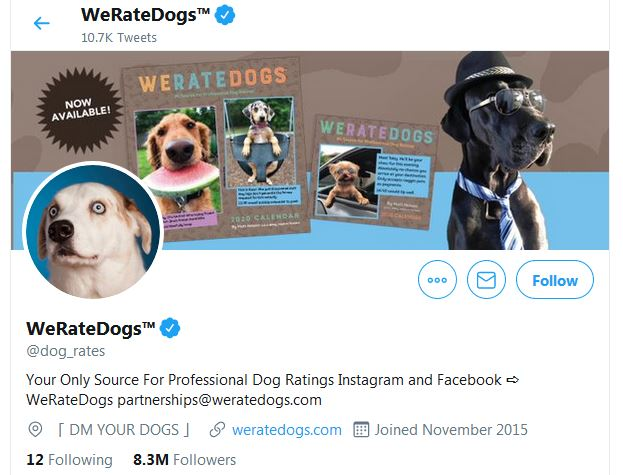

As always, import required Python packages and set up display options.

In [1]:
import pandas as pd
import numpy as np
import requests, tweepy, json, os, time
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
sns.set(style="darkgrid")
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
% matplotlib inline

### Step 1: Gather Data

**Data in this project comes from three different sources:**

1. Enhanced Twitter Archive data as a csv file 'twitter-archive-enhanced.csv'
2. The neural network tweet image prediction as a tsv file hosted on Udacity's server.
3. Additional Data via the Twitter API (which has the retweet count and favorite count information).

First, let's work on the `Enhanced Twitter Archive data`. It is provided to us as a csv file. We just have to upload it into the Jupyter notebook folder, and   read in the data as below:

In [2]:
archive_data = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive_data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


Next is to gather the `The tweet image prediction` data on Udacity's server. We can use the `requests` package to fetch the tsv file and write it to a local tsv file.

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
os.listdir()

['image_predictions.tsv',
 'tweet_json.txt',
 'act_report.html',
 '.ipynb_checkpoints',
 'act_report.ipynb',
 'predictions.tsv',
 'wrangle_report.html',
 'twitter_archive_master.csv',
 'wrangle_report.ipynb',
 'wrangle_act.ipynb',
 'twitter-archive-enhanced.csv']

We see that the new `predictions.tsv` file which contains the tweet image prediction data has been saved to our local directory. Let's read in the data and have a look at the first few rows. 

In [6]:
predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [7]:
predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


Finally, we will need to use Python's Tweepy library to store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. 

In [8]:
# Setting up the tweepy API library.

# consumer_key = 'hidden'
# consumer_secret = 'hidden'
# access_token = 'hidden'
# access_secret = 'hidden'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
# Get the list of tweet ids for querying data using tweepy API library.
tweet_id_list =  list(archive_data.tweet_id)

In [10]:
# Will hide this block of code as already obtained the twitter API data.

# tweet_counter = 0
# error_count = 0
# success_count = 0
# errors = {}

# start = time.time()
# with open('tweet_json.txt', 'w') as file:
    # for id in tweet_id_list:
        # tweet_counter += 1
        # print('Working on tweet #{}'.format(tweet_counter))
        # try:
            #t1 = api.get_status(id, tweet_mode='extended', parser=tweepy.parsers.JSONParser())
            #json.dump(t1, file)
            #file.write('\n')
            #success_count += 1
        # except tweepy.TweepError as e:
            # print('Having issues getting data for tweet ID: {}'.format(id))
            # error_count += 1
            # errors[str(id)]= e
            # pass
            
# end = time.time()
# runtime_in_min = round((end - start)/60, 2) 
# print('Data gathering complete! Collected {} tweets info from Twitter API. Encountered {} errors.'.format(success_count, error_count)) 
# print('Total run time: {} minutes'.format(round(runtime_in_min, 1)))

In [11]:
os.listdir()

['image_predictions.tsv',
 'tweet_json.txt',
 'act_report.html',
 '.ipynb_checkpoints',
 'act_report.ipynb',
 'predictions.tsv',
 'wrangle_report.html',
 'twitter_archive_master.csv',
 'wrangle_report.ipynb',
 'wrangle_act.ipynb',
 'twitter-archive-enhanced.csv']

As we can see, the new file `tweet_json.txt` was created. 

The next step is to read this .txt file line by line into a pandas DataFrame with tweet ID, retweet count, favorite count, and language info. 

In [12]:
api_tweets = pd.read_json('tweet_json.txt', lines=True)

In [13]:
api_tweets.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [14]:
api_tweets = api_tweets[['id', 'retweet_count', 'favorite_count', 'lang']]

In [15]:
api_tweets.head(3)

,id,retweet_count,favorite_count,lang
0,892420643555336193,7976,37217,en
1,892177421306343426,5916,32007,en
2,891815181378084864,3911,24103,en


**Now, we have gathered all the twitter data needed for this project, and read them into three separate dataframes: `archive_data`, `predictions`, `api_tweets`. It is time to assess our data.**

### Step 2: Assess Data

**We will look at both the data quality (Completeness, Validity, Accuracy, Consistency) and data tidiness, and document our findings before we moving on to the cleaning step.** 

### Data Quality issues

**archive_data table**
- Missing values for the columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.
- 'source' column has extra html tags.
- 'timestamp' column had 'object' datatype.
- Dog types have missing values coded as 'None'.
- Dog names have missing values coded as 'None'.
- 'expanded_urls' column has missing values.
- 'tweet_id' column has 'int64' datatype.
- Duplicated 'expanded_urls' due to retweets.
- Some of the Dog ratings extracted incorrectly.
    - Some rating_denominator is not 10.
    - rating extraction values were not correct (involving float numbers, two ratings in the tweet text)
    - group ratings of dogs (rated several dogs in one picture)
    - non-dog ratings (24/7, other animals/non-animals, etc..)
- Some of the Dog names extracted incorrectly.   



**predictions table**
- `tweet_id` column is in numeric datatype.
- Duplicated `jpg_url` and predictions.



**api_tweets table**
- `id` column is in the format of 'int64'.
- `id` column name inconsistent with other tables (`tweet_id`).



### Data Tidiness issues

**archive_data table**
- Variables are in columns: 'doggo', 'floofer', 'pupper', 'puppo'.


**predictions table**
- 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' columns might not be useful for our analysis. 
- 'predictions' table can be merged with the 'archive_data' table.


**api_tweets table**
- 'api_tweets' table can be merged with the 'archive_data' table.


*__Let's look at the three dataframes one by one, starting from the `archive_data`.__*

In [16]:
archive_data.head(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None


By visual assessment, we see that there are missing values for the columns: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'. Also, the 'source' column has extra html tags that may not be useful for our analysis. Third, 'doggo', 'floofer', 'pupper', 'puppo' were used as columns (variables are in columns). This is a tidiness issue. Finally, some tweets did not mention any dog types and dog names (coded as 'None'). 

Next, let's assess the data programmatically. 

In [17]:
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

We found that the `timestamp` column had the datatype: 'object' . And also we confirmed column: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' had lots of missing values. We also see that the `expanded_urls` has missing values. And finally, the `tweet_id` has the 'int64' datatype. Since we won't be doing numeric calculations on the tweet ids, it should be in 'object' datatype instead. 

Next, I looked at possible duplicated values in columns: 'tweet_id', 'timestamp', expanded_urls' and found there are some duplicates in the 'expanded_urls' column as below.

In [18]:
archive_data[archive_data.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps://t.co/245xJJElsY https://t.co/lUiQH219v6",NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps://t.co/Xp01EU3qyD https://t.co/V5lkvrGLdQ,NaN,NaN,NaN,"https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1",12,10,Sierra,None,None,pupper,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Cooper. His expression is the same wet or dry. Absolute 12/10 but Coop desperately requests your help\n\nhttps://t.co/ZMTE4Mr69f https://t.co/7RyeXTYLNi,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twitter.com/dog_rates/status/868552278524837888/photo/1",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13,10,Jamesy,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.co/W86h5dgR6c,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/866334964761202691/photo/1,https://twitter.com/dog_rates/status/866334964761202691/photo/1",12,10,Coco,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:

Some are missing values, recognized as duplicates, and others might be real duplicates. Let's further investigate.

In [19]:
archive_data[archive_data.index == 75].expanded_urls.value_counts()

https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1    1
Name: expanded_urls, dtype: int64

In [20]:
archive_data[archive_data.expanded_urls == 'https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps://t.co/245xJJElsY https://t.co/lUiQH219v6",NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None


It seems that for the above duplicate in 'expanded_urls', one of the record is a retweet. We will document this and delete the retweets during the data cleaning step. 

In [21]:
archive_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

Using code, we verified the extra html tag issue with the 'source' column. 

Next, we look at the dog ratings, starting from the numerator.    

In [22]:
archive_data.rating_numerator.describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

The maximum rating was 1776 which is very odd. Let's dig into this. 

In [23]:
archive_data.rating_numerator.value_counts().sort_index()

0       2  
1       9  
2       9  
3       19 
4       17 
5       37 
6       32 
7       55 
8       102
9       158
10      461
11      464
12      558
13      351
14      54 
15      2  
17      1  
20      1  
24      1  
26      1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      2  
80      1  
84      1  
88      1  
99      1  
121     1  
143     1  
144     1  
165     1  
182     1  
204     1  
420     2  
666     1  
960     1  
1776    1  
Name: rating_numerator, dtype: int64

Looks like there are quite a few scores requires further investigation. Starting from rating 15, the number of ratings started to decrease dramatically, so we will use 15 as a cut off point. 

In [24]:
archive_data.query('rating_numerator > 15')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


Here, we identified several issues. First, there are incidences where the rating_denominator is not 10. Second, there are incidence where the rating extraction values were not correct (involving float numbers), such as index 695 row. The real rating should be 9.75/10 instead of 75/10. Third, there are group ratings of dogs, which should be excluded from the analysis. Fourth, there are non-dog ratings such as 24/7 which should be excluded as well. Fifth, some ratings were extracted incorrectly when there are two ratings in the text (usually the second one is the real rating). However, the rating of 1776 for the dog Atticus is actually legit! 

Let's also take a look at the lower dog ratings.  

In [25]:
archive_data.query('rating_numerator <4')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
605,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10
765,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
1016,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10
1189,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3,10
1249,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3,10
1314,This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu,3,10
1406,This is Charl. He's a bully. Chucks that dumbbell around like its nothing. Sharp neck. Exceptionally unfluffy. 3/10 https://t.co/VfLoDZecJ7,3,10
1446,After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,1,10
1478,Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper https://t.co/fShNNhBWYx,3,10


It seems that most of the lower ratings were non-dog ratings.. There are pictures/ratings for chickens, cows, goats, dinosaurs, and a Empire State building.. Data extraction errors such as records (index) 2246, 2335 were found as well. 

In [26]:
# archive_data[archive_data.text.str.contains('odd|Oddly|strange|rare')].query('rating_numerator <7')

What about dog names? Where they extracted correctly?

In [27]:
archive_data.name.value_counts()[:17]

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
Oliver     11 
Tucker     10 
Lola       10 
Penny      10 
Bo         9  
Winston    9  
the        8  
Sadie      8  
Buddy      7  
Bailey     7  
Toby       7  
an         7  
Name: name, dtype: int64

In [28]:
archive_data[archive_data.name.str.match('[a-z]|None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitte

Using regular expression, we found several dog names that were not extracted correctly. The names were extracted as 'None', 'a', 'an', 'the', 'quite', etc.. and should be replaced by 'N/A'. 

**Next is to look at the `predictions` table to identify quality/tidiness issues.** 

In [29]:
predictions.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False


In [30]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Data indicated the `tweet_id` column is in numeric datatype. And if we look into the `p2_conf` and `p3_conf` values, they are quite low compared to `p1_conf`. In this case, I would drop the 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' columns.  

In [31]:
predictions.jpg_url.duplicated().sum()

66

In [32]:
predictions[predictions.jpg_url.duplicated()][:3]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True


In [33]:
predictions[predictions.jpg_url == 'https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg'] 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True


We also found 66 duplicated 'jpg_url', with duplicated predictions. 

Furthermore, we should merge the predictions table with the archieve_data table on `tweet_id`. The predictions of 'False' for dogs may help us filter the non-dog tweets/ratings. 

**Finally, we look at the `api_tweets` table to identify quality/tidiness issues.** 

In [34]:
api_tweets.head(7)

,id,retweet_count,favorite_count,lang
0,892420643555336193,7976,37217,en
1,892177421306343426,5916,32007,en
2,891815181378084864,3911,24103,en
3,891689557279858688,8120,40528,en
4,891327558926688256,8806,38758,en
5,891087950875897856,2930,19476,en
6,890971913173991426,1942,11367,en


In [35]:
api_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
id                2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
lang              2333 non-null object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


Again, the `id` column is in the format of 'int64', but it should be as 'object' datatype. Also, we will need to rename the `id` column as `tweet_id` and merge with the `archive_data` table (following the rules of tidy data). 

Here, we identified several data quality and tidiness issues from all three dataframes. Now it is time to clean the data!

### Step 3: Cleaning Data

First thing do to is to make a copy of each dataframe.

In [36]:
archive_data_clean = archive_data.copy()
predictions_clean = predictions.copy()
api_tweets_clean = api_tweets.copy()

Then, we follow the 'Define', 'Clean', 'Test' sequence to tackle each quality/tidiness issue. We will start with missing data first. 

#### `archive_data_clean` table
- Missing values for the columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id'.

#### Define

- Drop columns: 'in_reply_to_status_id', 'in_reply_to_user_id'.
- Drop rows with not null 'retweeted_status_id'. 
- Drop columns: 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.

#### Clean

In [37]:
archive_data_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis= 1, inplace=True)

In [38]:
archive_data_clean = archive_data_clean.query('retweeted_status_id != retweeted_status_id')

In [39]:
archive_data_clean.retweeted_status_id.isnull().sum(), archive_data_clean.retweeted_status_id.notnull().sum()

(2175, 0)

In [40]:
archive_data_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis= 1, inplace=True)

#### Test

In [41]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


As we can see, the above data cleaning was a success. Next is to work on the missing values for 'expanded_urls'.

#### Define

- Drop rows with missing 'expanded_urls'. (archive_data_clean table)

#### Clean

In [42]:
archive_data_clean = archive_data_clean[archive_data_clean.expanded_urls.notnull()]

#### Test

In [43]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


Looks good! Moving forward, we will clean the duplicated 'expanded_urls'. Most of them should be addressed when we eliminated the retweets. 

#### Define

- Check and drop duplicates for 'expanded_urls' (archive_data_clean table). 

#### Clean

In [44]:
archive_data_clean.expanded_urls.duplicated().sum()

1

In [45]:
archive_data_clean[archive_data_clean.expanded_urls.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2212,668587383441514497,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None


Let's take a look at this one and only duplicated 'expanded_urls'.

In [46]:
archive_data_clean[archive_data_clean.expanded_urls == 'https://vine.co/v/ea0OwvPTx9l']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
657,791774931465953280,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
2212,668587383441514497,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None


It seems that this same dog has been rated twice at different time points. In this case, I will keep the older record, and drop the other(index 657).

In [47]:
archive_data_clean.drop(657, axis= 0, inplace=True)

#### Test

In [48]:
archive_data_clean[archive_data_clean.expanded_urls == 'https://vine.co/v/ea0OwvPTx9l']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2212,668587383441514497,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None


Next, we will work on cleaning the 'name' column. 

#### Define 

- Replace all the incorrect dog names with 'NaN'. ('archive_data_clean' table) 
- Replace all the 'None' values with 'NaN' for the 'name' column ('archive_data_clean' table) 

#### Clean

In [49]:
dup_list = archive_data_clean[archive_data_clean.name.str.match('[a-z]')]['name'].drop_duplicates().values

In [50]:
dup_list

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [51]:
# Create a function to replace the error names 
def replace_name(dog):
    if dog['name'] in dup_list:
        return np.nan
    else:
        return dog['name']

archive_data_clean['name'] = archive_data_clean.apply(replace_name, axis=1)

Now it is time to replace the 'None' names as 'NaN'. 

In [52]:
archive_data_clean.name = archive_data_clean.name.replace('None', np.nan)

#### Test

In [53]:
archive_data_clean[archive_data_clean.name == 'a'], archive_data_clean[archive_data_clean.name == 'mad'], archive_data_clean[archive_data_clean.name == 'None']

(Empty DataFrame
 Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
 Index: [], Empty DataFrame
 Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
 Index: [], Empty DataFrame
 Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
 Index: [])

**As we can see, after the cleaning there are no dog names coded as 'a', 'mad' or 'None' anymore.** 

In [54]:
archive_data_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2238,668113020489474048,2015-11-21 17:05:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alfie. He's that one hypocritical gym teacher who made you run laps. Great posture. Cool bench. 6/10 https://t.co/GCJzm3YsfX,https://twitter.com/dog_rates/status/668113020489474048/photo/1,6,10,Alfie,None,None,None,None
1645,683849932751646720,2016-01-04 03:18:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jiminy. He's not the brightest dog. Needs to lay off the kibble. 5/10 still petable https://t.co/omln4LOy1x,https://twitter.com/dog_rates/status/683849932751646720/photo/1,5,10,Jiminy,None,None,None,None
1786,677573743309385728,2015-12-17 19:39:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sandy. He's sexually confused. Thinks he's a pigeon. Also an All-American cheese catcher. 10/10 so petable https://t.co/Htu8plSqEu,"https://twitter.com/dog_rates/status/677573743309385728/photo/1,https://twitter.com/dog_rates/status/677573743309385728/photo/1",10,10,Sandy,None,None,None,None


In [55]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2116 non-null int64
timestamp             2116 non-null object
source                2116 non-null object
text                  2116 non-null object
expanded_urls         2116 non-null object
rating_numerator      2116 non-null int64
rating_denominator    2116 non-null int64
name                  1391 non-null object
doggo                 2116 non-null object
floofer               2116 non-null object
pupper                2116 non-null object
puppo                 2116 non-null object
dtypes: int64(3), object(9)
memory usage: 214.9+ KB


After cleaning, we see about 700 tweets didn't mention the dog names. Now, we will tackle the tidiness issue of the 'doggo', 'floofer', 'pupper', 'puppo' columns as below. 

#### Define 

archive_data_clean table
- Convert 'tweet_id' column datatype into 'object'.
- Convert 'timestamp' column datatype into 'datetime64'.

In [56]:
#### Clean

In [57]:
archive_data_clean.tweet_id = archive_data_clean.tweet_id.astype(str)

In [58]:
archive_data_clean.timestamp = pd.to_datetime(archive_data_clean.timestamp)

In [59]:
#### Test

In [60]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2116 non-null object
timestamp             2116 non-null datetime64[ns]
source                2116 non-null object
text                  2116 non-null object
expanded_urls         2116 non-null object
rating_numerator      2116 non-null int64
rating_denominator    2116 non-null int64
name                  1391 non-null object
doggo                 2116 non-null object
floofer               2116 non-null object
pupper                2116 non-null object
puppo                 2116 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 214.9+ KB


In [61]:
archive_data_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


#### Define 

- Extract dog state information from the tweet text, save in a new column 'dog_stage'. ('arhive_data_clean' table)
- Inspect the 'dog_stage' column, identify potential issues. Address these issues one by one. 
- Drop the old 'doggo', 'floofer', 'pupper', 'puppo' columns.

#### Clean

Let's have a snapshot of how the dogs are categorized currently. 

In [62]:
archive_data_clean.doggo.value_counts(), archive_data_clean.floofer.value_counts(), archive_data_clean.pupper.value_counts(),archive_data_clean.puppo.value_counts()

(None     2032
 doggo    84  
 Name: doggo, dtype: int64, None       2106
 floofer    10  
 Name: floofer, dtype: int64, None      1884
 pupper    232 
 Name: pupper, dtype: int64, None     2092
 puppo    24  
 Name: puppo, dtype: int64)

Next, we will extract the dog stage directly from the tweeter text as below. I noticed for the dog type 'floofer', WeRateDogs used 'floof' or 'floofs' to describe it. So I used 'floof' as the regular expression phase for searching.

In [63]:
archive_data_clean['dog_stage'] = archive_data_clean.text.str.lower().str.findall(r'(doggo|floof|pupper|puppo)')

Then we extract the dog type from the matching list results.

In [64]:
archive_data_clean.dog_stage = archive_data_clean.dog_stage.apply(lambda x: ','.join(set(x)))

In [65]:
archive_data_clean.dog_stage.value_counts()

                1712
pupper          247 
doggo           78  
floof           36  
puppo           28  
pupper,doggo    10  
doggo,puppo     2   
floof,doggo     2   
pupper,floof    1   
Name: dog_stage, dtype: int64

We found there are multipule dog types for a few dogs. Let's look into this. 

In [66]:
archive_data_clean[archive_data_clean.dog_stage == 'doggo,pupper']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage


Checking the links above, we found there are Three types of scenarios.  

First scenario: Two dogs were in the same photo, and rated as the same time.

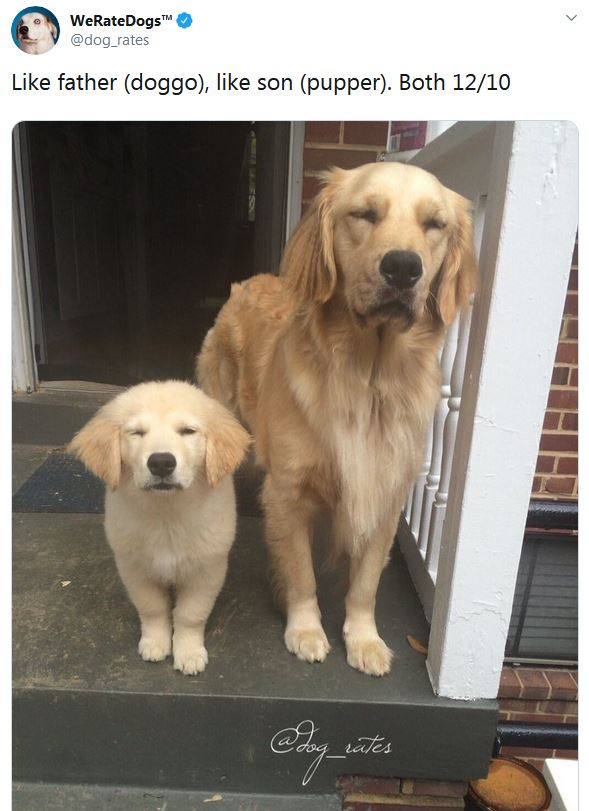

Second scenario: No dogs in the photo! Rated a hedgehog..

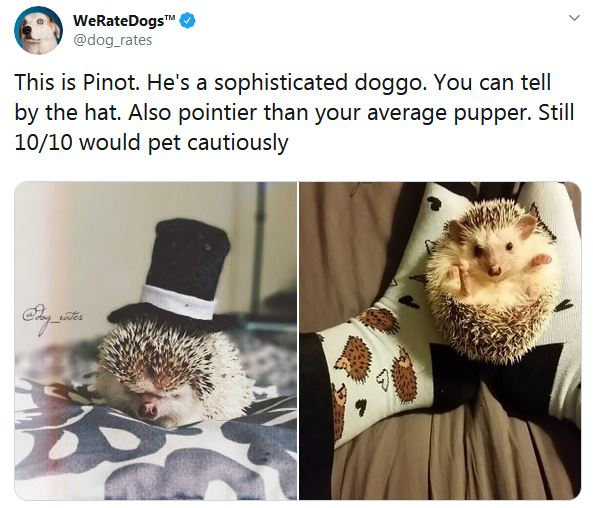

Third scenario: There is only one correct dog type, but extracted two types. 

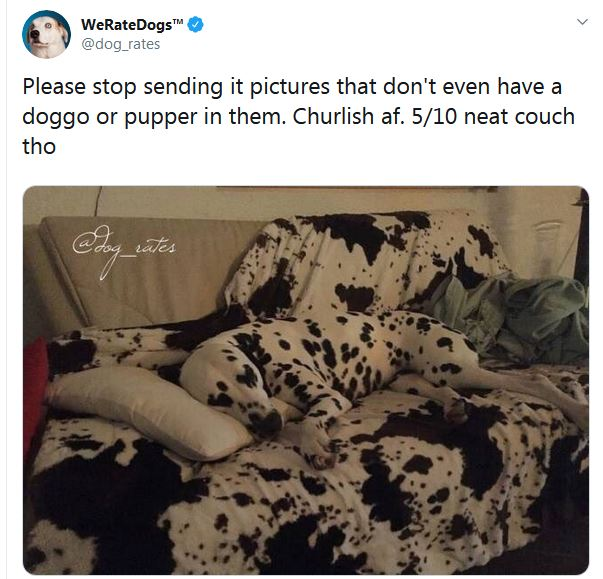

In this case, we will drop the rows for the first scenario as we wanted to include single dog ratings in our analysis. 

Also it might be a good idea to drop the rows for the second scenario as are only interested in rating dogs..

We will fix the third scenario's dog type manually. (not too many of them)  

In [67]:
archive_data_clean.loc[575, 'dog_stage'] = 'pupper'

In [68]:
archive_data_clean.loc[956, 'dog_stage'] = 'doggo'

In [69]:
archive_data_clean = archive_data_clean[archive_data_clean.dog_stage != 'doggo,pupper']

In [70]:
archive_data_clean.dog_stage.value_counts()

                1712
pupper          248 
doggo           79  
floof           36  
puppo           28  
pupper,doggo    8   
doggo,puppo     2   
floof,doggo     2   
pupper,floof    1   
Name: dog_stage, dtype: int64

Now, let's have a look at the records with 'dog_stage' as 'pupper,doggo'.

In [71]:
archive_data_clean[archive_data_clean.dog_stage == 'pupper,doggo']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
460,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None,"pupper,doggo"
531,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,NaN,doggo,None,pupper,None,"pupper,doggo"
565,802265048156610565,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,NaN,doggo,None,pupper,None,"pupper,doggo"
705,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None,"pupper,doggo"
733,781308096455073793,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo,None,pupper,None,"pupper,doggo"
889,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,pupper,None,"pupper,doggo"
1063,741067306818797568,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,NaN,doggo,None,pupper,None,"pupper,doggo"
1113,733109485275860992,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",https://twitter.com/dog_rates/status/733109485275860992/photo/1,12,10,NaN,doggo,None,pupper,None,"pupper,doggo"


In [72]:
archive_data_clean.loc[460, 'dog_stage'] = 'pupper'

In [73]:
archive_data_clean = archive_data_clean[archive_data_clean.dog_stage != 'pupper,doggo']

In [74]:
archive_data_clean.dog_stage.value_counts()

                1712
pupper          249 
doggo           79  
floof           36  
puppo           28  
doggo,puppo     2   
floof,doggo     2   
pupper,floof    1   
Name: dog_stage, dtype: int64

In [75]:
archive_data_clean[archive_data_clean.dog_stage == 'doggo,puppo']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
172,858843525470990336,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13,10,NaN,doggo,None,None,None,"doggo,puppo"
191,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,NaN,doggo,None,None,puppo,"doggo,puppo"


In [76]:
archive_data_clean.loc[191, 'dog_stage'] = 'puppo'

In [77]:
archive_data_clean = archive_data_clean[archive_data_clean.dog_stage != 'doggo,puppo']

In [78]:
archive_data_clean[archive_data_clean.dog_stage == 'doggo,floof']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage


In [79]:
archive_data_clean.loc[200, 'dog_stage'] = 'doggo'

In [80]:
archive_data_clean = archive_data_clean[archive_data_clean.dog_stage != 'doggo,floof']

In [81]:
archive_data_clean[archive_data_clean.dog_stage == 'floof,pupper']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage


In [82]:
archive_data_clean.loc[1152, 'dog_stage'] = 'floof'

Next, let's replace 'floof' with 'floofer', and replace "" with NaN for missing values.

In [83]:
archive_data_clean.dog_stage = archive_data_clean.dog_stage.replace('floof', 'floofer') 

In [84]:
archive_data_clean.dog_stage = archive_data_clean.dog_stage.replace("", np.nan)

Lastly, we will drop the old 'doggo', 'floofer', 'pupper', 'puppo' columns as they are no longer needed. 

In [85]:
archive_data_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [86]:
archive_data_clean.dog_stage.value_counts()

pupper         249
doggo          80 
floofer        37 
puppo          29 
floof,doggo    1  
Name: dog_stage, dtype: int64

In [87]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2108 non-null object
timestamp             2108 non-null datetime64[ns]
source                2108 non-null object
text                  2108 non-null object
expanded_urls         2108 non-null object
rating_numerator      2108 non-null int64
rating_denominator    2108 non-null int64
name                  1389 non-null object
dog_stage             396 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 244.7+ KB


Moving on, it is time to clean the 'source' column tags and extract the useful information out.

#### Define 

archive_data_clean table
- Use regular expression to extract the real source info from the 'source' column.
- Rename 'Vine - Make a Scene' as 'Vine App'

#### Clean

In [88]:
archive_data_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1978
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        89  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     30  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

We can see that the real source is between a '">' and '>'. 

In [89]:
archive_data_clean.source = archive_data_clean.source.str.extract(r'">(.+)<', expand=False)

In [90]:
archive_data_clean.source = archive_data_clean.source.replace('Vine - Make a Scene', 'Vine App')

#### Test

In [91]:
archive_data_clean.source.value_counts()

Twitter for iPhone    1978
Vine App              89  
Twitter Web Client    30  
TweetDeck             11  
Name: source, dtype: int64

Finally, we will work on the dog rating columns and clean up the ratings. 

#### Define 

archive_data_clean table
- convert 'rating_numerator' into float datatype.
- check if records with tweet text starting with '@' still 
- filter the records with numerator ratings > 14, fix incorrect ratings, delete non-dog ratings, group ratings, non-ratings tweets.
- filter the records with numerator ratings < 4, fix incorrect ratings, delete non-dog ratings, group ratings, non-ratings tweets.
- convert denominator ratings to 10.0. 

#### Clean

I noticed there are ratings such as 13.5/10 in the tweet text, so 'float' should be the datatype for the 'rating_numerator' column (instead of 'int'). 

In [92]:
archive_data_clean.rating_numerator = archive_data_clean.rating_numerator.astype(float)

Next, a quick check for replied tweets. We should have dropped these records  eariler.

In [93]:
archive_data_clean[archive_data_clean.text.str.contains('^@', na=False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


Step 3, inspect and clean ratings > 14. As below, we found they are rare and worth further investigation. 

In [94]:
archive_data_clean.rating_numerator.value_counts().sort_index()

0.0       2  
1.0       5  
2.0       9  
3.0       19 
4.0       16 
5.0       34 
6.0       32 
7.0       52 
8.0       98 
9.0       154
10.0      435
11.0      416
12.0      484
13.0      294
14.0      39 
24.0      1  
26.0      1  
27.0      1  
44.0      1  
45.0      1  
50.0      1  
60.0      1  
75.0      1  
80.0      1  
84.0      1  
88.0      1  
99.0      1  
121.0     1  
143.0     1  
144.0     1  
165.0     1  
204.0     1  
420.0     1  
1776.0    1  
Name: rating_numerator, dtype: int64

In [95]:
archive_data_clean.query('rating_numerator > 15')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80


In [96]:
rows_to_drop = [433, 516, 902, 1120, 1228, 1254, 1274, 1351, 1433, 1634, 1635, 1712, 1779, 1843, 2074]

We will drop the rows with non-dog ratings, group ratings, non-ratings tweets.

In [97]:
archive_data_clean.drop(rows_to_drop, axis= 0, inplace=True)

In [98]:
archive_data_clean.query('rating_numerator > 15')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50


Let's manually fix the record 1202 (index) and search for records that involves in floating points ratings. 

In [99]:
archive_data_clean.loc[1202, 'rating_numerator'] = 11

In [100]:
archive_data_clean.loc[1202, 'rating_denominator'] = 10

In [101]:
archive_data_clean[archive_data_clean.text.str.contains(r'[0-9]{1,2}\.[0-9]+/[0-9]+', na=False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
45,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5.0,10,Bella,NaN
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10,Logan,NaN
763,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10,Sophie,pupper


The good news is only 3 records has floating point numbers in the rating numerator. We clean them one by one as below.

In [102]:
archive_data_clean.loc[45, 'rating_numerator'] = 13.5

In [103]:
archive_data_clean.loc[695, 'rating_numerator'] = 9.75

In [104]:
archive_data_clean.loc[763, 'rating_numerator'] = 11.27

Confirm the ratings are fixed.

In [105]:
archive_data_clean[archive_data_clean.text.str.contains(r'[0-9]{1,2}\.[0-9]+/[0-9]+', na=False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
45,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10,Bella,NaN
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,NaN
763,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,pupper


Next, we will filter the records with numerator ratings < 4, fix incorrect ratings, delete non-dog ratings, group ratings, non-ratings tweets.

In [106]:
archive_data_clean.query('rating_numerator <4')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0.0,10
765,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3.0,10
1016,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0.0,10
1189,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3.0,10
1249,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3.0,10
1314,This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu,3.0,10
1406,This is Charl. He's a bully. Chucks that dumbbell around like its nothing. Sharp neck. Exceptionally unfluffy. 3/10 https://t.co/VfLoDZecJ7,3.0,10
1478,Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper https://t.co/fShNNhBWYx,3.0,10
1601,This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 must be rare https://t.co/NOIiRWr5Jf,3.0,10
1692,This is Chuck. He's a neat dog. Very flexible. Trapped in a glass case of emotion. Devastatingly unfluffy 3/10 https://t.co/YqbU9xHV3p,3.0,10


After visual examination of the data, I found that only record index: 1764, 2183, 2246, 2335 are real dog ratings. records index 2246, 2335 also had rating extraction errors which need fixing. 

In [107]:
archive_data_clean.loc[2246, 'rating_numerator'] = 12

In [108]:
archive_data_clean.loc[2335, 'rating_numerator'] = 9

In [109]:
archive_data_clean.loc[2335, 'rating_denominator'] = 10

In [110]:
archive_data_clean.query('index == [1764 , 2183, 2246, 2335]')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1764,678424312106393600,2015-12-20 03:58:55,Twitter for iPhone,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,https://twitter.com/dog_rates/status/678424312106393600/photo/1,2.0,10,Crystal,NaN
2183,668989615043424256,2015-11-24 03:08:48,Twitter for iPhone,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX,https://twitter.com/dog_rates/status/668989615043424256/photo/1,3.0,10,Bernie,NaN
2246,667878741721415682,2015-11-21 01:34:35,Twitter for iPhone,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,https://twitter.com/dog_rates/status/667878741721415682/photo/1,12.0,10,Tedrick,NaN
2335,666287406224695296,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9.0,10,NaN,NaN


A quick check for the corrected records. Next, we will drop the rows for non-dog ratings, group ratings, non-ratings tweets.

In [111]:
rows_to_drop = archive_data_clean.query('(rating_numerator <4) & (index != [1764 , 2183, 2246, 2335])').index

In [112]:
archive_data_clean.drop(rows_to_drop, axis=0, inplace=True)

Checking again after the drop:

In [113]:
archive_data_clean.query('rating_numerator <4')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
1764,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,2.0,10
2183,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX,3.0,10


These two dog's low ratings are legit. Moving on, I will check the ratings with '&amp' in the tweet text. 

In [114]:
archive_data_clean[archive_data_clean.text.str.contains(r'[0-9]+&amp', na=False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2216,668537837512433665,2015-11-22 21:13:35,Twitter for iPhone,This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba,https://twitter.com/dog_rates/status/668537837512433665/photo/1,8.0,10,Spark,NaN
2246,667878741721415682,2015-11-21 01:34:35,Twitter for iPhone,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,https://twitter.com/dog_rates/status/667878741721415682/photo/1,12.0,10,Tedrick,NaN


Only two tweets have them. We fixed the second one, and the first one is ligit as well if you look at the tweet photo. 

Now let's look at the rating denominator values:

In [115]:
archive_data_clean.rating_denominator.value_counts()

10    2059
11    2   
20    1   
Name: rating_denominator, dtype: int64

Most of them are 10. Only 3 records to dig into.

In [116]:
archive_data_clean.query('rating_denominator > 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1068,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9.0,11,NaN,NaN
1165,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4.0,20,NaN,NaN
1662,682962037429899265,2016-01-01 16:30:13,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7.0,11,Darrel,NaN


Let's manually clean the records (index): 1068, 1662 and drop the record: 1165 as it is group dog rating. 

In [117]:
archive_data_clean.loc[1068, 'rating_numerator'] = 14

In [118]:
archive_data_clean.loc[1068, 'rating_denominator'] = 10

In [119]:
archive_data_clean.drop(1165, axis=0, inplace=True)

In [120]:
archive_data_clean.loc[1662, 'rating_numerator'] = 10

In [121]:
archive_data_clean.loc[1662, 'rating_denominator'] = 10

#### Test

In [122]:
archive_data_clean.rating_denominator.value_counts()

10    2061
Name: rating_denominator, dtype: int64

In [123]:
archive_data_clean.rating_numerator.value_counts()

12.00      485
10.00      436
11.00      417
13.00      294
9.00       154
8.00       98 
7.00       51 
14.00      40 
5.00       33 
6.00       32 
4.00       15 
9.75       1  
2.00       1  
3.00       1  
13.50      1  
11.27      1  
1776.00    1  
Name: rating_numerator, dtype: int64

#### Define 

- Further check and clean the 'name' column.

As I was playing around with regular expression matching, I noticed some names previously coded as 'a' were not really 'NaN'. Let's look into this. 

In [124]:
archive_data_clean[archive_data_clean.text.str.contains('^This is a', na=False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1002,747885874273214464,2016-06-28 20:14:22,Twitter for iPhone,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8.0,10,NaN,NaN
1017,746872823977771008,2016-06-26 01:08:52,Twitter for iPhone,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11.0,10,NaN,NaN
1025,746369468511756288,2016-06-24 15:48:42,Twitter for iPhone,This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,https://twitter.com/dog_rates/status/746369468511756288/photo/1,9.0,10,NaN,NaN
1040,744223424764059648,2016-06-18 17:41:06,Twitter for iPhone,This is actually a pupper and I'd pet it so well. 12/10\nhttps://t.co/RNqS7C4Y4N,https://twitter.com/strange_animals/status/672108316018024452,12.0,10,NaN,pupper
1049,743222593470234624,2016-06-15 23:24:09,Twitter for iPhone,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12.0,10,NaN,pupper
1138,728035342121635841,2016-05-05 01:35:26,Twitter for iPhone,This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh,"https://twitter.com/dog_rates/status/728035342121635841/photo/1,https://twitter.com/dog_rates/status/728035342121635841/photo/1",12.0,10,NaN,pupper
1207,715733265223708672,2016-04-01 02:51:22,Twitter for iPhone,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,https://twitter.com/dog_rates/status/715733265223708672/photo/1,10.0,10,NaN,NaN
1361,703079050210877440,2016-02-26 04:48:02,Twitter for iPhone,This is a Butternut Cumberfloof. It's not windy they just look like that. 11/10 back at it again with the red socks https://t.co/hMjzhdUHaW,"https://twitter.com/dog_rates/status/703079050210877440/photo/1,https://twitter.com/dog_rates/status/703079050210877440/photo/1",11.0,10,NaN,floofer
1362,703041949650034688,2016-02-26 02:20:37,Twitter for iPhone,This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,https://twitter.com/dog_rates/status/703041949650034688/photo/1,10.0,10,NaN,NaN
1368,702539513671897089,2016-02-24 17:04:07,Twitter for iPhone,This is a Wild Tuscan Poofwiggle. Careful not to startle. Rare tongue slip. One eye magical. 12/10 would def pet https://t.co/4EnShAQjv6,"https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1",12.0,10,NaN,NaN


#### Clean

We can use regular expression to extract and replace these dog names. 

In [125]:
index_a = archive_data_clean[archive_data_clean.text.str.contains('^This is a', na=False)].index

In [126]:
archive_data_clean.loc[index_a, 'name'] = archive_data_clean.loc[index_a, :].text.str.extract(r'named\s(\w+)\.', expand=False)

#### Test

In [127]:
archive_data_clean[archive_data_clean.text.str.contains('^This is a', na=False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1002,747885874273214464,2016-06-28 20:14:22,Twitter for iPhone,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8.0,10,NaN,NaN
1017,746872823977771008,2016-06-26 01:08:52,Twitter for iPhone,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11.0,10,NaN,NaN
1025,746369468511756288,2016-06-24 15:48:42,Twitter for iPhone,This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,https://twitter.com/dog_rates/status/746369468511756288/photo/1,9.0,10,NaN,NaN
1040,744223424764059648,2016-06-18 17:41:06,Twitter for iPhone,This is actually a pupper and I'd pet it so well. 12/10\nhttps://t.co/RNqS7C4Y4N,https://twitter.com/strange_animals/status/672108316018024452,12.0,10,NaN,pupper
1049,743222593470234624,2016-06-15 23:24:09,Twitter for iPhone,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12.0,10,NaN,pupper
1138,728035342121635841,2016-05-05 01:35:26,Twitter for iPhone,This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh,"https://twitter.com/dog_rates/status/728035342121635841/photo/1,https://twitter.com/dog_rates/status/728035342121635841/photo/1",12.0,10,NaN,pupper
1207,715733265223708672,2016-04-01 02:51:22,Twitter for iPhone,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,https://twitter.com/dog_rates/status/715733265223708672/photo/1,10.0,10,NaN,NaN
1361,703079050210877440,2016-02-26 04:48:02,Twitter for iPhone,This is a Butternut Cumberfloof. It's not windy they just look like that. 11/10 back at it again with the red socks https://t.co/hMjzhdUHaW,"https://twitter.com/dog_rates/status/703079050210877440/photo/1,https://twitter.com/dog_rates/status/703079050210877440/photo/1",11.0,10,NaN,floofer
1362,703041949650034688,2016-02-26 02:20:37,Twitter for iPhone,This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,https://twitter.com/dog_rates/status/703041949650034688/photo/1,10.0,10,NaN,NaN
1368,702539513671897089,2016-02-24 17:04:07,Twitter for iPhone,This is a Wild Tuscan Poofwiggle. Careful not to startle. Rare tongue slip. One eye magical. 12/10 would def pet https://t.co/4EnShAQjv6,"https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1",12.0,10,NaN,NaN


As we can see, the name extraction and replacement was sucessful. 

#### That was a lot of cleaning! 

#### Now it's time to work on the 'predictions_clean' table.

Recall that we had quality issues and tidiness issues as below:

Quality:
    - tweet_id column is in numeric datatype.
    - Duplicated jpg_url and predictions.


Tidiness:
    - 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' columns might not be useful for our analysis.
    - Predictions table can be merged with the 'archive_data' table.

Note that the duplicated jpg_url and predictions (due to retweet) can be addressed when merging with the 'archive_data_clean' table. And also we might be able to take advantage of the image predictions to further identify records of non-dog ratings. 

#### Define 

- Convert 'tweet_id' column into 'object' datatype.

#### Clean

In [128]:
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

#### Test

In [129]:
predictions_clean.tweet_id.dtype

dtype('O')

#### Define 

- Drop 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' columns from 'predictions_clean' table.

#### Clean

In [130]:
predictions_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

#### Test

In [131]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


#### Define 

- Merge the 'archive_data_clean' table with 'predictions_clean' table, save the new table as 'twitter_archive_master' 

We will use a 'inner merge' here to eliminate retweet records and already dropped/cleaned records.

#### Clean

First, it might be a good idea to get a picture of the two tables before merging. 

In [132]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


In [133]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2061 non-null object
timestamp             2061 non-null datetime64[ns]
source                2061 non-null object
text                  2061 non-null object
expanded_urls         2061 non-null object
rating_numerator      2061 non-null float64
rating_denominator    2061 non-null int64
name                  1397 non-null object
dog_stage             384 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 241.0+ KB


In [134]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


In [135]:
archive_data_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN


In [136]:
twitter_archive_master = archive_data_clean.merge(predictions_clean, how= 'inner', on='tweet_id', sort=True)

#### Test

In [137]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


In [138]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1940 entries, 0 to 1939
Data columns (total 14 columns):
tweet_id              1940 non-null object
timestamp             1940 non-null datetime64[ns]
source                1940 non-null object
text                  1940 non-null object
expanded_urls         1940 non-null object
rating_numerator      1940 non-null float64
rating_denominator    1940 non-null int64
name                  1356 non-null object
dog_stage             350 non-null object
jpg_url               1940 non-null object
img_num               1940 non-null int64
p1                    1940 non-null object
p1_conf               1940 non-null float64
p1_dog                1940 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 214.1+ KB


#### Now it is time to clean the 'api_tweets_clean' table.

We will rename the 'id' column as 'tweet_id', correct its datatype, and merge with the 'twitter_archive_master' table.

#### Define 

- Rename the 'id' column as 'tweet_id'.
- Convert 'tweet_id' column datatype as 'object'.

#### Clean

In [139]:
api_tweets_clean= api_tweets_clean.rename(columns={'id':'tweet_id'})

In [140]:
api_tweets_clean.tweet_id = api_tweets_clean.tweet_id.astype(str)

#### Test

In [141]:
api_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
tweet_id          2333 non-null object
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
lang              2333 non-null object
dtypes: int64(2), object(2)
memory usage: 73.0+ KB


#### Define 

- Merge the 'api_tweets_clean' table with 'twitter_archive_master' table.

#### Clean

In [142]:
twitter_archive_master = twitter_archive_master.merge(api_tweets_clean, how='inner', on='tweet_id', sort=True)

#### Test

In [143]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 17 columns):
tweet_id              1933 non-null object
timestamp             1933 non-null datetime64[ns]
source                1933 non-null object
text                  1933 non-null object
expanded_urls         1933 non-null object
rating_numerator      1933 non-null float64
rating_denominator    1933 non-null int64
name                  1349 non-null object
dog_stage             348 non-null object
jpg_url               1933 non-null object
img_num               1933 non-null int64
p1                    1933 non-null object
p1_conf               1933 non-null float64
p1_dog                1933 non-null bool
retweet_count         1933 non-null int64
favorite_count        1933 non-null int64
lang                  1933 non-null object
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 258.6+ KB


In [144]:
twitter_archive_master.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count,lang
0,666020888022790149,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,481,2478,en
1,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,45,124,en
2,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,43,121,en


#### Saving our combined master dataset into a csv file.

In [145]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

### Exploratory Data Analysis (EDA)

##### Now that we completed the data wrangling steps, it is time to explore the data! 

##### Question #1: Which dog has the highest rating (by WeRateDogs)? 

In [146]:
twitter_archive_master.query('rating_numerator == rating_numerator.max()')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count,lang
1222,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,2534,5271,en


**By querying the dataframe, we discovered the highest rating dog! His name is Atticus, and a whopping rating of 1776 is very accurate indeed!** 

Interestingly, the image prediction recognized the picture as a non-dog bow_tie.. (see photo below)

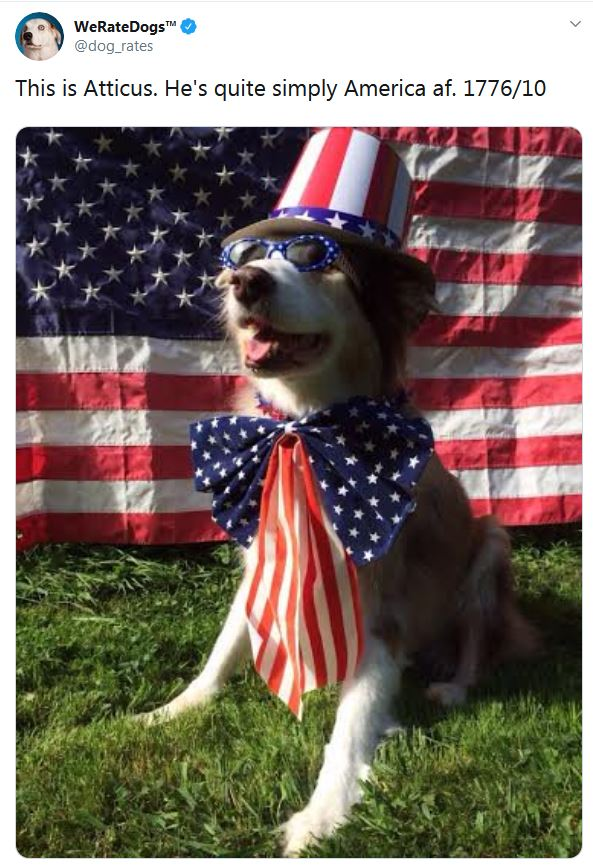

##### Question #2: Which dog is most favored by twitter readers? (most favorite_count) 

In [147]:
twitter_archive_master.query('favorite_count == favorite_count.max()')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count,lang
1174,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador_retriever,0.825333,True,80488,160808,en


**It appears that this Labrador doggo rated at 13/10 is most favored by twitter readers with 160808 favorite counts. He/she can stand in the pool! Also, the neural network prediction worked this time!**      

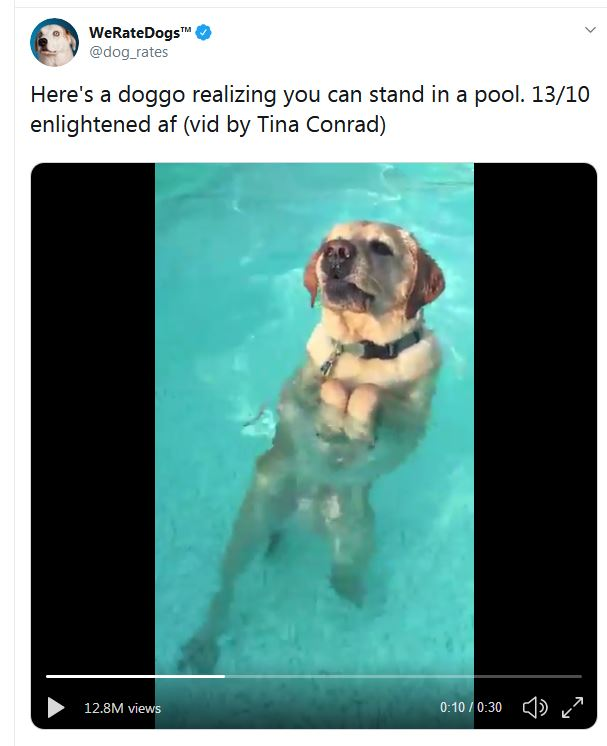

To further explore the data, we will make a copy of the 'twitter_archive_master' dataframe and drop the record with the rating 1776/10 as it is the only big outlier for the 'rating_numerator'. 

In [148]:
twitter_archive_master_copy = twitter_archive_master.copy()

In [149]:
twitter_archive_master_copy = twitter_archive_master_copy[twitter_archive_master_copy.rating_numerator != 1776.0]

In [150]:
twitter_archive_master_copy.rating_numerator.value_counts()

12.00    445
10.00    418
11.00    396
13.00    256
9.00     151
8.00     95 
7.00     51 
14.00    36 
5.00     32 
6.00     32 
4.00     15 
11.27    1  
13.50    1  
9.75     1  
2.00     1  
3.00     1  
Name: rating_numerator, dtype: int64

**Then, we will take advantage of the hisogram to explore distributions of single numeric variables in our dataset as below.**

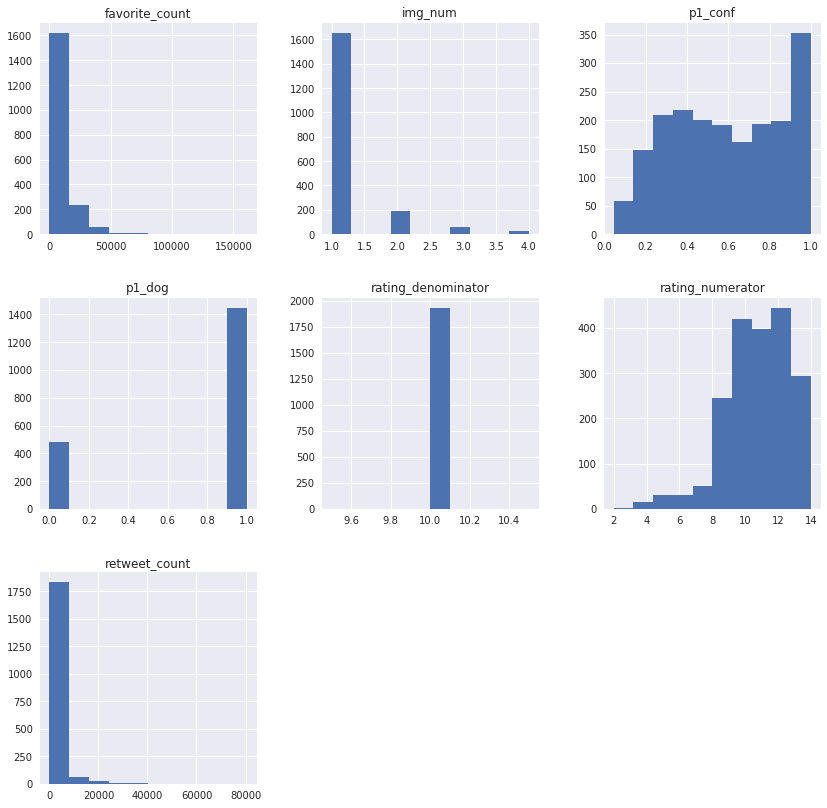

In [151]:
twitter_archive_master_copy.hist(figsize=(14,14));

**From the data above, we observed some interesting trends.** 

1. The favorite count and retweet count distribution is Right-Skewed. Most of the tweets' favaorite count and retweet count are below 10000.
2. The rating numerator distribution is Left-Skewed, meaning more dogs are rating as higher ratings than lower ratings.
3. We see that the algorithm #1 prediction confidence rate had a peek between 0.9-1.0.

Let's further explore the favorite count distribution with a better plot.

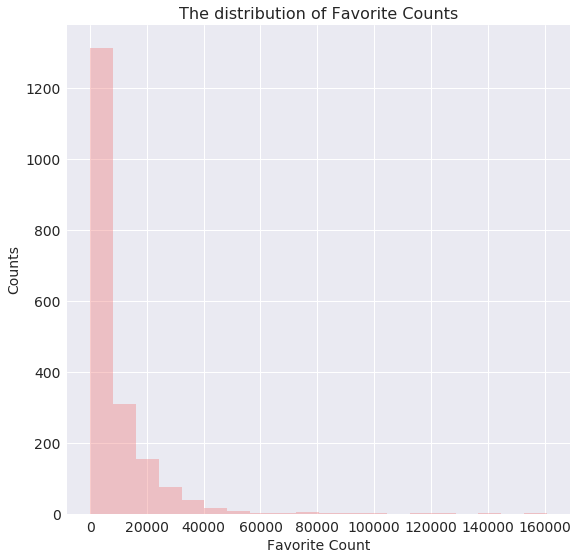

In [152]:
fig, ax = plt.subplots(figsize=(9,9))
sns.distplot(twitter_archive_master_copy.favorite_count, kde=False, ax=ax, bins= 20, color='lightcoral');
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Favorite Count', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('The distribution of Favorite Counts', fontsize=16); 

Another way to explore data is to use the 'scatter_matrix'. It might help us gain insights of relationships between two numeric variables.

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=10.0, right=10.0
  'left=%s, right=%s') % (left, right))
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=10.0, top=10.0
  'bottom=%s, top=%s') % (bottom, top))


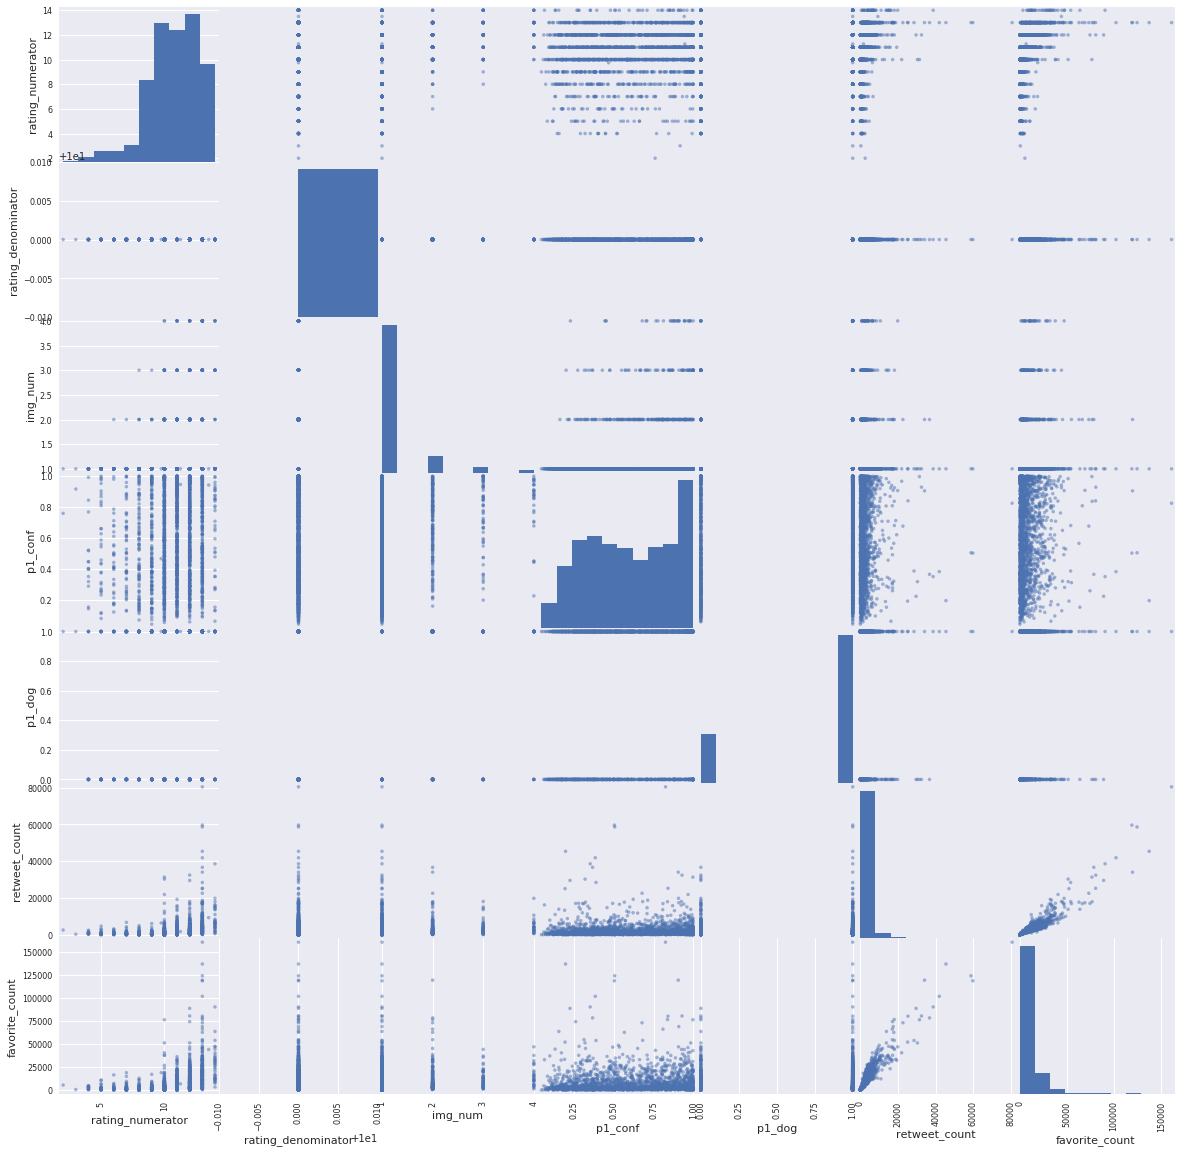

In [153]:
scatter_matrix(twitter_archive_master_copy, figsize=(20,20));

**We can there is a strong positive correlation between the retweet count and favorite count, and a weaker positive relationship between the rating numerator and favorite/retweet count.**

Let's build some better plot.

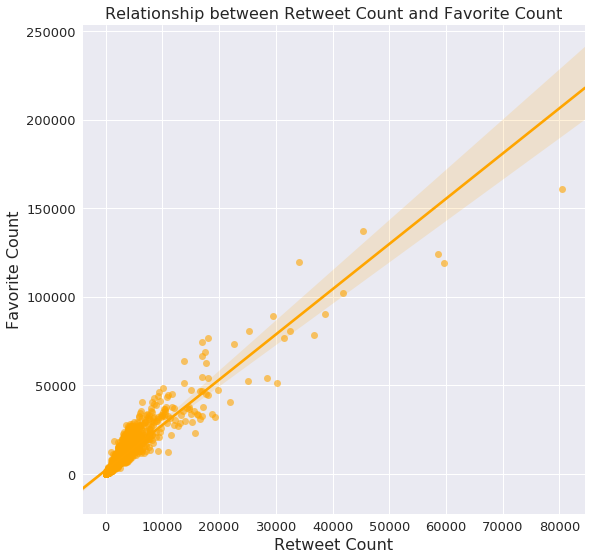

In [154]:
fig, ax = plt.subplots(figsize=(9,9))
sns.regplot(x="retweet_count", y="favorite_count", data=twitter_archive_master_copy, ax=ax, color='orange', scatter_kws={'alpha':0.6});
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Retweet Count', fontsize=16)
plt.ylabel('Favorite Count', fontsize=16)
plt.title('Relationship between Retweet Count and Favorite Count', fontsize=16); 

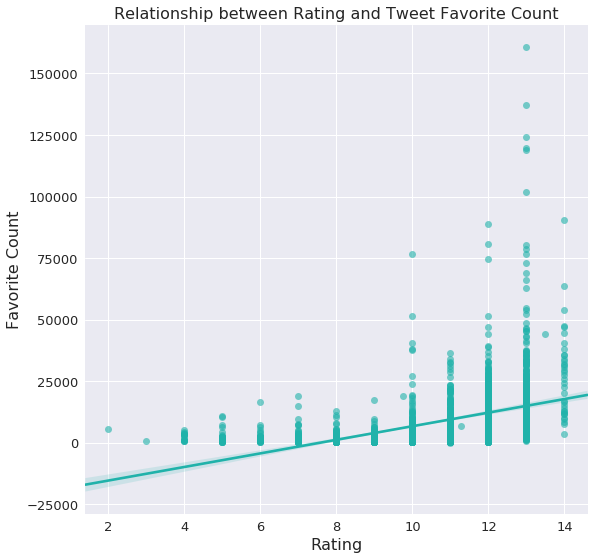

In [155]:
fig, ax = plt.subplots(figsize=(9,9))
sns.regplot(x="rating_numerator", y="favorite_count", data=twitter_archive_master_copy, ax=ax, color='lightseagreen', scatter_kws={'alpha':0.6});
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Rating', fontsize=16)
plt.ylabel('Favorite Count', fontsize=16)
plt.title('Relationship between Rating and Tweet Favorite Count', fontsize=16); 

As we can see, the positive relationship between rating (numerator) and favorite count is not as strong as the relationship between retweet count and favorite Count.

### Summary

In this project, I focused mainly on the data wrangling process. I gathered data from three different sources and spent a lot of time assessing/cleaning the data. After the data is cleaned, I performed exploratory data analysis (EDA) and uncovered some insights/trends. I feel that more exploratory work could be done and will continue to work on this project along the way.  

### Acknowledgement

- Stackoverflow: https://stackoverflow.com/
- Seaborn: https://seaborn.pydata.org/index.html
- Pandas documentation: https://pandas.pydata.org/pandas-docs/stable/
- Tweepy documentation: https://tweepy.readthedocs.io/en/latest/
- https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object

**Special thanks to my Udacity mentor: Raj V.** 